<a href="https://colab.research.google.com/github/giovanniattina/scc5871-trabalhoFinal/blob/main/Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado de Maquina - Giovanni




**Alunos:**
1. Giovanni Attina do Nascimento 9286614

**Mental Health Detection Dataset**

A base escolhida dados de Degue da cidade de  São Paulo e Rio de Janeiro, fonte https://datasus.saude.gov.br/informacoes-de-saude-tabnet/:
- Casos Prováveis por Ano epidem. 1º Sintomas(s) segundo Ano 1º Sintoma(s)
Ano notificação: 2024
Semana epidem. notificação: Em Branco/ign, Semana 01, Semana 02, Semana 03, Semana 04, Semana 05, Semana 06, Semana 07, Semana 08, Semana 09, Semana 10, Semana 11, Semana 12, Semana 13, Semana 14, Semana 15, Semana 16, Semana 17, Semana 18, Semana 19, Semana 20, Semana 21, Semana 22, Semana 23, Semana 24, Semana 25, Semana 26, Semana 27, Semana 28, Semana 29, Semana 30, Semana 31, Semana 32, Semana 33, Semana 34, Semana 35, Semana 36, Semana 37, Semana 38, Semana 39, Semana 40, Semana 41, Semana 42, Semana 43, Semana 44, Semana 45, Semana 46, Semana 47, Semana 48, Semana 49, Semana 50, Semana 51, Semana 52, Semana 53
UF de notificação: Rio de Janeiro
Município de notificação: 330455 RIO DE JANEIRO
Período: 2014-2024
- 355030 SAO PAULO  

Dados meteorologicos: https://tempo.inmet.gov.br/TabelaEstacoes/A121



**Objetivo:** Queremos analisar o cruzamento de dados metereologicos com casos de dengue nas Cidades de São Paulo e Rio de Janeiro

# Todos

[x] Transforma dados meterologicos em float

[x] Tratar dados nulos meterologicos

[x] tirar columnas não necessarias dos dados meterologicos

[X] Verificar as colunas repitidas, se estão no mesmo forma e transforma-las

[x] Ver formato dos dados de degue e se tem nulos

[x] Fazer analise de correlação de person dos dados meterologicos

[] Fazer um grafico com com uma linha para cada ano dos dados

[x] Agrupar dados meterologicos por dia

[] Agrupar os dados meterologicos por semanas do ano todo, usando a média

[] Agrupar DataSet de dengue e meterologico


In [190]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [191]:
%ls /content/drive/MyDrive/'Pos Graduação'/SCC5871/Trabalho/dados


'Casos Dengue RJ.csv'  'Casos Dengue SP.csv'   rj/   sp/


In [192]:
import pandas as pd
import numpy as np

import os

import seaborn as sns
import matplotlib.pyplot as plt

# Leitura dos dados

## Dengue

In [193]:
path_dengue_sp = "/content/drive/MyDrive/Pos Graduação/SCC5871/Trabalho/dados/Casos Dengue SP.csv"
path_dengue_rj = "/content/drive/MyDrive/Pos Graduação/SCC5871/Trabalho/dados/Casos Dengue RJ.csv"

In [194]:
len(range(54,74))

20

In [195]:
def read_dengue_files(path):
  df = pd.read_csv(
      path_dengue_rj,
      encoding='latin1',
      sep=';',
      na_values='-',
      skiprows=list(range(0,3)),
      skipfooter=27,
      engine='python')
  df.columns = df.iloc[0]
  df = df.iloc[1:]
  df.fillna(value=0, inplace=True)
  return df


In [196]:
df_dengue_sp = read_dengue_files(path_dengue_sp)
df_dengue_rj = read_dengue_files(path_dengue_rj)

In [197]:
df_dengue_rj.head()

,Ano 1º Sintoma(s),Em Branco/ign,Semana 01,Semana 02,Semana 03,Semana 04,Semana 05,Semana 06,Semana 07,Semana 08,...,Semana 45,Semana 46,Semana 47,Semana 48,Semana 49,Semana 50,Semana 51,Semana 52,Semana 53,Total
1,Em Branco/ign,0,0,0,0,0,0,0,0,1,...,0,1,6,0,0,0,0,0,0,9
2,<1975,16,0,3,1,3,2,4,2,3,...,0,4,4,2,3,2,3,4,0,131
3,1975,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,1976,0,0,0,0,0,0,0,0,1,...,0,1,0,0,2,0,0,0,0,8
5,1977,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,4


In [198]:
df_dengue_sp.head()

,Ano 1º Sintoma(s),Em Branco/ign,Semana 01,Semana 02,Semana 03,Semana 04,Semana 05,Semana 06,Semana 07,Semana 08,...,Semana 45,Semana 46,Semana 47,Semana 48,Semana 49,Semana 50,Semana 51,Semana 52,Semana 53,Total
1,Em Branco/ign,0,0,0,0,0,0,0,0,1,...,0,1,6,0,0,0,0,0,0,9
2,<1975,16,0,3,1,3,2,4,2,3,...,0,4,4,2,3,2,3,4,0,131
3,1975,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,1976,0,0,0,0,0,0,0,0,1,...,0,1,0,0,2,0,0,0,0,8
5,1977,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,4


## Dados meterologicos

In [199]:
# Specify the directory
directory_sp = '/content/drive/MyDrive/Pos Graduação/SCC5871/Trabalho/dados/sp/'
directory_rj = '/content/drive/MyDrive/Pos Graduação/SCC5871/Trabalho/dados/sp/'


# List all files and directories in the specified directory
print(os.listdir(directory_sp))
print(os.listdir(directory_rj))


['INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2015_A_31-12-2015.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2014_A_31-12-2014.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2016_A_31-12-2016.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2017_A_31-12-2017.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2020_A_31-12-2020.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2019_A_31-12-2019.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2023_A_31-12-2023.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2024_A_30-04-2024.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2021_A_31-12-2021.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2022_A_31-12-2022.CSV']
['INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2015_A_31-12-2015.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2014_A_31-12-2014.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2016_A_31-12-2016.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2017_A_31-12-2017.CSV', 'INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-20

In [200]:
def read_met_files(directory):

  dataframes = []
  files_and_dirs = os.listdir(directory_sp)
  for file in files_and_dirs:
      file_path = os.path.join(directory, file)
      print(file_path)

      df = pd.read_csv(
          file_path,
          encoding='latin1',
          sep=';',
          skiprows=range(0,8))
      dataframes.append(df)
  return pd.concat(dataframes, ignore_index=True)


In [201]:
sp_df_met = read_met_files(directory_sp)
rj_df_met = read_met_files(directory_rj)

/content/drive/MyDrive/Pos Graduação/SCC5871/Trabalho/dados/sp/INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2015_A_31-12-2015.CSV
/content/drive/MyDrive/Pos Graduação/SCC5871/Trabalho/dados/sp/INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2014_A_31-12-2014.CSV
/content/drive/MyDrive/Pos Graduação/SCC5871/Trabalho/dados/sp/INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2016_A_31-12-2016.CSV
/content/drive/MyDrive/Pos Graduação/SCC5871/Trabalho/dados/sp/INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2017_A_31-12-2017.CSV
/content/drive/MyDrive/Pos Graduação/SCC5871/Trabalho/dados/sp/INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2020_A_31-12-2020.CSV
/content/drive/MyDrive/Pos Graduação/SCC5871/Trabalho/dados/sp/INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2019_A_31-12-2019.CSV
/content/drive/MyDrive/Pos Graduação/SCC5871/Trabalho/dados/sp/INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-01-2023_A_31-12-2023.CSV
/content/drive/MyDrive/Pos Graduação/SCC5871/Trabalho/dados/sp/INMET_SE_SP_A701_SAO PAULO - MIRANTE_01-0

In [202]:
sp_df_met.shape

(81792, 23)

In [203]:
sp_df_met.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81792 entries, 0 to 81791
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   DATA (YYYY-MM-DD)                                      35064 non-null  object 
 1   HORA (UTC)                                             35064 non-null  object 
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       81127 non-null  object 
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  81562 non-null  object 
 4   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        81558 non-null  object 
 5   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       81558 non-null  object 
 6   RADIACAO GLOBAL (KJ/m²)                                39651 non-null  object 
 7   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           81562 non-null  object 
 8   TEMPERATURA DO PONTO DE ORVALHO (°C)          

# Pré-processamento

## Dados Dengue

### Remover colunas e linha não usadas
- Remover Coluna Total
- Remover coluna

In [204]:
df_dengue_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 1 to 51
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ano 1º Sintoma(s)  51 non-null     object
 1   Em Branco/ign      51 non-null     object
 2   Semana 01          51 non-null     object
 3   Semana 02          51 non-null     object
 4   Semana 03          51 non-null     object
 5   Semana 04          51 non-null     object
 6   Semana 05          51 non-null     object
 7   Semana 06          51 non-null     object
 8   Semana 07          51 non-null     object
 9   Semana 08          51 non-null     object
 10  Semana 09          51 non-null     object
 11  Semana 10          51 non-null     object
 12  Semana 11          51 non-null     object
 13  Semana 12          51 non-null     object
 14  Semana 13          51 non-null     object
 15  Semana 14          51 non-null     object
 16  Semana 15          51 non-null     object
 17 

In [205]:
if 'Total' in df_dengue_sp:
  df_dengue_sp.drop(['Total'], axis=1, inplace=True)

if 'Total' in df_dengue_rj:
  df_dengue_rj.drop(['Total'], axis=1, inplace=True)

if 'Em Branco/ign' in df_dengue_sp:
  df_dengue_sp.drop(['Em Branco/ign'], axis=1, inplace=True)

if 'Em Branco/ign' in df_dengue_rj:
  df_dengue_rj.drop(['Em Branco/ign'], axis=1, inplace=True)

df_dengue_rj = df_dengue_rj.iloc[1:, :]
df_dengue_sp = df_dengue_sp.iloc[1:, :]



In [206]:

if 'Ano 1º Sintoma(s)' in df_dengue_sp:
  df_dengue_sp["Ano"] = df_dengue_sp["Ano 1º Sintoma(s)"]
  df_dengue_sp.drop(['Ano 1º Sintoma(s)'], axis=1, inplace=True)

if 'Ano 1º Sintoma(s)' in df_dengue_rj:
  df_dengue_rj["Ano"] = df_dengue_rj["Ano 1º Sintoma(s)"]
  df_dengue_rj.drop(['Ano 1º Sintoma(s)'], axis=1, inplace=True)

<ipython-input-206-841ce6d9e2c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dengue_sp["Ano"] = df_dengue_sp["Ano 1º Sintoma(s)"]
<ipython-input-206-841ce6d9e2c1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dengue_sp.drop(['Ano 1º Sintoma(s)'], axis=1, inplace=True)
<ipython-input-206-841ce6d9e2c1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

In [207]:
df_dengue_sp.head()

,Semana 01,Semana 02,Semana 03,Semana 04,Semana 05,Semana 06,Semana 07,Semana 08,Semana 09,Semana 10,...,Semana 45,Semana 46,Semana 47,Semana 48,Semana 49,Semana 50,Semana 51,Semana 52,Semana 53,Ano
2,0,3,1,3,2,4,2,3,1,4,...,0,4,4,2,3,2,3,4,0,<1975
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1975
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,2,0,0,0,0,1976
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1977
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1978


### Pivot Data

In [208]:
df_dengue_sp.columns

Index(['Semana 01', 'Semana 02', 'Semana 03', 'Semana 04', 'Semana 05',
       'Semana 06', 'Semana 07', 'Semana 08', 'Semana 09', 'Semana 10',
       'Semana 11', 'Semana 12', 'Semana 13', 'Semana 14', 'Semana 15',
       'Semana 16', 'Semana 17', 'Semana 18', 'Semana 19', 'Semana 20',
       'Semana 21', 'Semana 22', 'Semana 23', 'Semana 24', 'Semana 25',
       'Semana 26', 'Semana 27', 'Semana 28', 'Semana 29', 'Semana 30',
       'Semana 31', 'Semana 32', 'Semana 33', 'Semana 34', 'Semana 35',
       'Semana 36', 'Semana 37', 'Semana 38', 'Semana 39', 'Semana 40',
       'Semana 41', 'Semana 42', 'Semana 43', 'Semana 44', 'Semana 45',
       'Semana 46', 'Semana 47', 'Semana 48', 'Semana 49', 'Semana 50',
       'Semana 51', 'Semana 52', 'Semana 53', 'Ano'],
      dtype='object', name=0)

In [209]:
def stack_dengue_data(df):
  df_stack = df.set_index('Ano').stack()
  df_stack.index.names = ['Ano', 'Semana']

  df_stack = df_stack.reset_index()
  return pd.DataFrame(df_stack.rename(columns={0: 'Casos'}))



In [210]:
df_dengue_sp_stack = stack_dengue_data(df_dengue_sp)
df_dengue_rj_stack = stack_dengue_data(df_dengue_rj)

In [211]:
df_dengue_sp_stack

,Ano,Semana,Casos
0,<1975,Semana 01,0
1,<1975,Semana 02,3
2,<1975,Semana 03,1
3,<1975,Semana 04,3
4,<1975,Semana 05,2
...,...,...,...
2645,2024,Semana 49,0
2646,2024,Semana 50,0
2647,2024,Semana 51,0
2648,2024,Semana 52,0


### Colocar dados em Float

In [212]:
df_dengue_sp_stack['Casos'] = df_dengue_sp_stack['Casos'].astype('float64')
df_dengue_rj_stack['Casos'] = df_dengue_rj_stack['Casos'].astype('float64')

## Dados Meteorologicos

### Transforma object para float

In [213]:
float_columns = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'RADIACAO GLOBAL (KJ/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))',
    'VENTO, RAJADA MAXIMA (m/s)',
    'VENTO, VELOCIDADE HORARIA (m/s)',
    'RADIACAO GLOBAL (Kj/m²)'
    ]
for column in float_columns:
  if sp_df_met[column].dtypes == object:
    sp_df_met[column] = sp_df_met[column].str.replace(r'^,', '0,', regex=True).str.replace(',', '.').astype('float64')
    rj_df_met[column] = rj_df_met[column].str.replace(r'^,', '0,', regex=True).str.replace(',', '.').astype('float64')
  else:
    sp_df_met[column] = sp_df_met[column].astype('float64')
    rj_df_met[column] = rj_df_met[column].astype('float64')


### Tratando colunas duplicadas

In [214]:
sp_df_met["Data"] = pd.to_datetime(sp_df_met['Data'])
rj_df_met["Data"] = pd.to_datetime(rj_df_met['Data'])

sp_df_met["DATA (YYYY-MM-DD)"] = pd.to_datetime(sp_df_met["DATA (YYYY-MM-DD)"],  format='mixed')
rj_df_met["DATA (YYYY-MM-DD)"] = pd.to_datetime(rj_df_met["DATA (YYYY-MM-DD)"],  format='mixed')

sp_df_met['Hora UTC'] = pd.to_datetime(sp_df_met['Hora UTC'], format='%H%M UTC', errors='ignore').dt.time
sp_df_met["HORA (UTC)"] = pd.to_datetime(sp_df_met["HORA (UTC)"],  format='mixed').dt.time
rj_df_met['Hora UTC'] = pd.to_datetime(rj_df_met['Hora UTC'], format='%H%M UTC', errors='ignore').dt.time
rj_df_met["HORA (UTC)"] = pd.to_datetime(rj_df_met["HORA (UTC)"],  format='mixed').dt.time

In [216]:
sp_df_met[['RADIACAO GLOBAL (KJ/m²)', 'RADIACAO GLOBAL (Kj/m²)']].describe()

,RADIACAO GLOBAL (KJ/m²),RADIACAO GLOBAL (Kj/m²)
count,39651.000000,19969.000000
mean,-3419.655229,1375.486068
std,5650.455838,1174.357548
min,-9999.000000,0.000000
25%,-9999.000000,269.700000
50%,71.900000,1112.500000
75%,1333.200000,2368.000000
max,3998.900000,3999.600000


<Axes: xlabel='Data', ylabel='RADIACAO GLOBAL (KJ/m²)'>

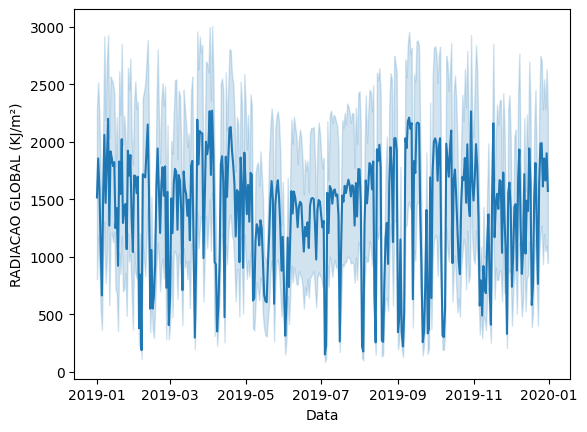

In [217]:
sns.lineplot(data=sp_df_met, x="Data", y='RADIACAO GLOBAL (KJ/m²)')


Os dados de radição estão na mesma escala, só precisam ser padrozinados posteriormente

### dados nulos

In [218]:
sp_df_met.isnull().sum()

DATA (YYYY-MM-DD)                                        46728
HORA (UTC)                                               46728
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                           665
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)      230
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)            234
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)           234
RADIACAO GLOBAL (KJ/m²)                                  42141
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)               230
TEMPERATURA DO PONTO DE ORVALHO (°C)                       233
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                 234
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                 234
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)           236
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)           238
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                   234
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                   234
UMIDADE RELATIVA DO AR, HORARIA (%)                    

In [219]:
rj_df_met.isnull().sum()

DATA (YYYY-MM-DD)                                        46728
HORA (UTC)                                               46728
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                           665
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)      230
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)            234
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)           234
RADIACAO GLOBAL (KJ/m²)                                  42141
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)               230
TEMPERATURA DO PONTO DE ORVALHO (°C)                       233
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                 234
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                 234
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)           236
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)           238
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                   234
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                   234
UMIDADE RELATIVA DO AR, HORARIA (%)                    

- Os dados tem algumas colunas repitadas que precisam ser agrupadas
  - DATA (YYYY-MM-DD) e Data
  - HORA (UTC) e Hora UTC
  - RADIACAO GLOBAL (KJ/m²) e RADIACAO GLOBAL (Kj/m²)
- Coluna Unnamed: 19  esta vazia em todas as linhas, remover ela
- as outras colunas, serão tratadas colocando a média dos valores
  - Este é um ponto que pode ser aprofundado, como melhorar a inputação dos outliers

In [220]:
duplicated_columns_pair = [('DATA (YYYY-MM-DD)', 'Data'), ('HORA (UTC)', 'Hora UTC'), ('RADIACAO GLOBAL (KJ/m²)', 'RADIACAO GLOBAL (Kj/m²)')]

In [221]:
for duplicated in duplicated_columns_pair:
  rj_df_met.loc[:,duplicated[0]].fillna(rj_df_met[duplicated[1]], inplace=True)
  sp_df_met.loc[:, duplicated[0]].fillna(sp_df_met[duplicated[1]], inplace=True)



rj_df_met.drop(['Unnamed: 19'], axis=1, inplace=True) if 'Unnamed: 19' in rj_df_met else None
sp_df_met.drop(['Unnamed: 19'], axis=1, inplace=True) if 'Unnamed: 19' in sp_df_met else None

for column in float_columns:
  rj_df_met.loc[:,column].fillna(rj_df_met[column].mean(), inplace=True)
  sp_df_met.loc[:,column].fillna(sp_df_met[column].mean(), inplace=True)




### Drop Columns

In [222]:
drop_columns = ['Data', 'Hora UTC', 'RADIACAO GLOBAL (Kj/m²)']


if all(column in rj_df_met for column in drop_columns):
  rj_df_met.drop(drop_columns, axis=1, inplace=True)
if all(column in sp_df_met for column in  drop_columns):
  sp_df_met.drop(drop_columns, axis=1, inplace=True)

### Concat dataset in one

1) Adicionar de qual cidade é o dado
2) Agrupar os dados

In [223]:
rj_df_met['Cidade'] = 'Rio de Janeiro'
sp_df_met['Cidade'] = 'São Paulo'

In [224]:
df_met = pd.concat([rj_df_met, sp_df_met])
df_met.head()

,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Cidade
0,2015-01-01,00:00:00,0.0,925.5,925.5,924.7,-9999.0,25.5,16.8,25.7,25.5,17.1,16.4,60.0,57.0,59.0,344.0,5.7,1.7,Rio de Janeiro
1,2015-01-01,01:00:00,0.0,926.0,926.0,925.5,-9999.0,25.4,15.7,25.9,25.4,16.8,15.2,59.0,52.0,55.0,306.0,4.8,0.8,Rio de Janeiro
2,2015-01-01,02:00:00,0.0,925.5,926.0,925.5,-9999.0,25.7,15.7,25.8,25.4,16.0,15.4,56.0,53.0,54.0,303.0,5.1,1.6,Rio de Janeiro
3,2015-01-01,03:00:00,0.0,925.0,925.5,925.0,-9999.0,25.3,16.5,25.7,25.3,16.5,15.3,58.0,53.0,58.0,297.0,4.9,2.0,Rio de Janeiro
4,2015-01-01,04:00:00,0.0,924.5,925.0,924.5,-9999.0,25.0,17.2,25.4,25.0,17.2,16.5,62.0,58.0,62.0,3.0,4.4,2.1,Rio de Janeiro


In [225]:
df_met.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163584 entries, 0 to 81791
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   DATA (YYYY-MM-DD)                                      163584 non-null  datetime64[ns]
 1   HORA (UTC)                                             163584 non-null  object        
 2   PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                       163584 non-null  float64       
 3   PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)  163584 non-null  float64       
 4   PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)        163584 non-null  float64       
 5   PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)       163584 non-null  float64       
 6   RADIACAO GLOBAL (KJ/m²)                                163584 non-null  float64       
 7   TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)           163584 

In [226]:
df_met.isnull().sum()

DATA (YYYY-MM-DD)                                        0
HORA (UTC)                                               0
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         0
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    0
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          0
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         0
RADIACAO GLOBAL (KJ/m²)                                  0
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             0
TEMPERATURA DO PONTO DE ORVALHO (°C)                     0
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               0
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         0
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         0
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 0
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                 0
UMIDADE RELATIVA DO AR, HORARIA (%)                      0
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                    

### Verifica outliears

In [227]:
df_met.select_dtypes(include=['float64'])

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,0.0,925.5,925.5,924.7,-9999.00000,25.5,16.8,25.7,25.5,17.1,16.4,60.0,57.0,59.0,344.0,5.7,1.7
1,0.0,926.0,926.0,925.5,-9999.00000,25.4,15.7,25.9,25.4,16.8,15.2,59.0,52.0,55.0,306.0,4.8,0.8
2,0.0,925.5,926.0,925.5,-9999.00000,25.7,15.7,25.8,25.4,16.0,15.4,56.0,53.0,54.0,303.0,5.1,1.6
3,0.0,925.0,925.5,925.0,-9999.00000,25.3,16.5,25.7,25.3,16.5,15.3,58.0,53.0,58.0,297.0,4.9,2.0
4,0.0,924.5,925.0,924.5,-9999.00000,25.0,17.2,25.4,25.0,17.2,16.5,62.0,58.0,62.0,3.0,4.4,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81787,0.8,926.2,926.8,926.0,534.10000,20.9,17.9,21.5,20.6,18.2,16.6,85.0,74.0,83.0,183.0,4.2,1.3
81788,0.0,925.8,926.3,925.8,1497.10000,23.0,18.9,23.0,20.8,19.3,17.5,83.0,77.0,78.0,164.0,4.3,1.8
81789,0.0,925.9,925.9,925.8,289.10000,22.3,18.6,23.0,22.3,19.0,18.2,81.0,77.0,80.0,183.0,4.1,1.5
81790,0.0,926.4,926.4,925.9,103.20000,21.4,17.3,22.3,21.4,18.7,17.2,80.0,77.0,77.0,157.0,5.1,2.1


In [228]:
df_met_float_columns = df_met.select_dtypes(include=['float64'])
Q1 = df_met_float_columns.quantile(q=0.25)

Q3 = df_met_float_columns.quantile(q=0.75)

IQR = Q3 - Q1

# qnt de outliers
outlier_q = ((df_met_float_columns < (Q1 - 1.5 * IQR)) | (df_met_float_columns > (Q3 + 1.5 * IQR)))
outlier_q.sum()

PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         14504
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)     2766
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)           2716
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)          2802
RADIACAO GLOBAL (KJ/m²)                                  33188
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)              2340
TEMPERATURA DO PONTO DE ORVALHO (°C)                      2902
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)                1962
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)                2858
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)          2370
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)          3068
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                  2806
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)                   730
UMIDADE RELATIVA DO AR, HORARIA (%)                       1352
VENTO, DIREÇÃO HORARIA (gr) (° (gr))                       688
VENTO, RAJADA MAXIMA (m/s)                             

In [229]:
def remove_outliers(df):
    # Copia o DataFrame para evitar modificar os dados originais
    df_filtered = df.copy()

    # Itera sobre cada coluna do DataFrame
    for col in df_filtered.select_dtypes(include=['float64']).columns:
        # Calcula Q1 (percentil 25) e Q3 (percentil 75)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calcula o Intervalo Interquartil (IQR)
        IQR = Q3 - Q1

        # Define os outliers como valores fora de (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtra os outliers
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

    return df_filtered

In [230]:
df_met = remove_outliers(df_met)

### Correlação das colunas

<Axes: >

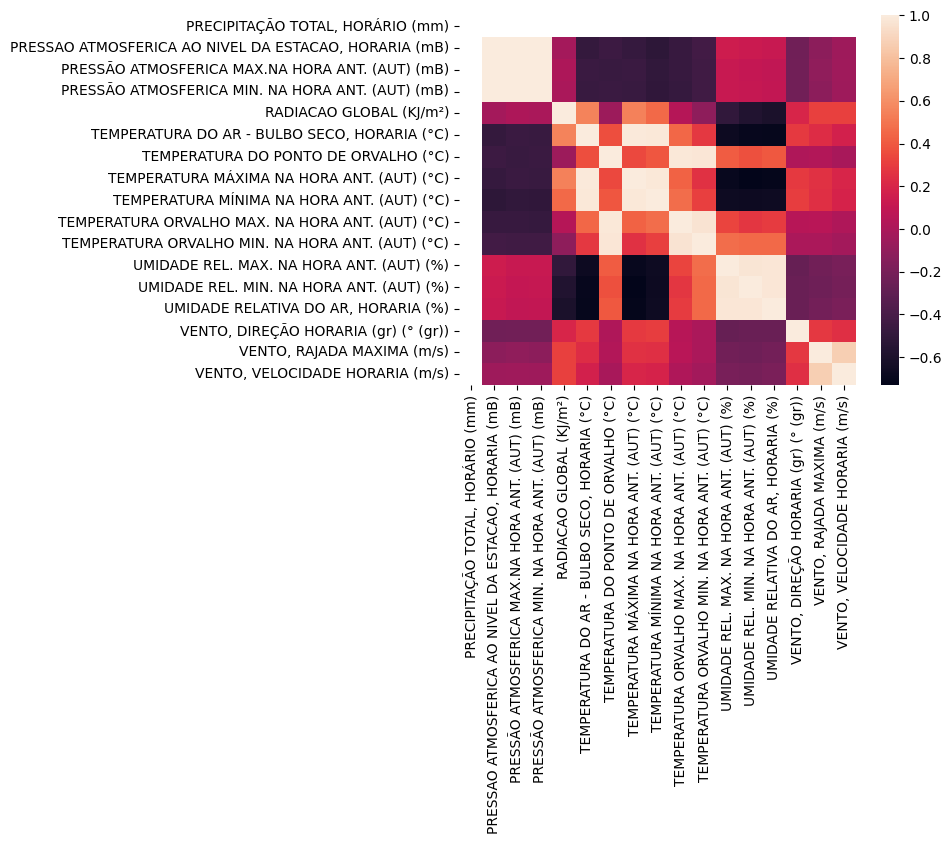

In [231]:
### Correlação

correlation_matrix = df_met.drop(
    ["DATA (YYYY-MM-DD)", "HORA (UTC)", "Cidade"], axis=1).corr()

sns.heatmap(correlation_matrix)

In [232]:
uppertri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
dropped_cols = [col for col in uppertri.columns if any(uppertri[col] > 0.9)]

In [233]:
df_met_f = df_met.drop(dropped_cols, axis=1)

#### Analise correlação
- Todos as variaveis tem correlação alta, como tem dados de Pressão, Temperatura, Umidade e Vento, analisar a correlação entre eles e entender se é possível continuar com apenas uma coluna de cada unidade

In [234]:
# prompt: criei uma variavél pressao_columns com todas as colunas com pressão no nome no dataframe df_met
'''
pressao_columns = [
    col for col in df_met.columns if ("PRESSAO" in col or "PRESSÃO" in col)
]
temperatura_columns = [
    col for col in df_met.columns if "TEMPERATURA" in col
]
umidade_columns = [
    col for col in df_met.columns if "UMIDADE" in col
]
vento_columns = [
    col for col in df_met.columns if "VENTO" in col
]
'''

'\npressao_columns = [\n    col for col in df_met.columns if ("PRESSAO" in col or "PRESSÃO" in col)\n]\ntemperatura_columns = [\n    col for col in df_met.columns if "TEMPERATURA" in col\n]\numidade_columns = [\n    col for col in df_met.columns if "UMIDADE" in col\n]\nvento_columns = [\n    col for col in df_met.columns if "VENTO" in col\n]\n'

In [235]:
#Selecionar as colunas com menor correlação para representarem cada conjunto de feature
'''
pressao_min_column = correlation_matrix.loc[pressao_columns, pressao_columns].min().idxmin()
temperatura_min_column = correlation_matrix.loc[temperatura_columns, temperatura_columns].min().idxmin()
umidade_min_column = correlation_matrix.loc[umidade_columns, umidade_columns].min().idxmin()
vento_min_column = correlation_matrix.loc[vento_columns, vento_columns].min().idxmin()
print(pressao_min_column)
print(temperatura_min_column)
print(umidade_min_column)
print(vento_min_column)
'''

'\npressao_min_column = correlation_matrix.loc[pressao_columns, pressao_columns].min().idxmin()\ntemperatura_min_column = correlation_matrix.loc[temperatura_columns, temperatura_columns].min().idxmin()  \numidade_min_column = correlation_matrix.loc[umidade_columns, umidade_columns].min().idxmin()\nvento_min_column = correlation_matrix.loc[vento_columns, vento_columns].min().idxmin()\nprint(pressao_min_column)\nprint(temperatura_min_column)\nprint(umidade_min_column)\nprint(vento_min_column)\n'

In [236]:
'''
df_met_f = pd.concat(
  [df_met[['DATA (YYYY-MM-DD)', 'HORA (UTC)', 'Cidade']],
   df_met[[pressao_min_column, temperatura_min_column, umidade_min_column, vento_min_column]]],
  axis=1)
df_met_f.head()
'''


"\ndf_met_f = pd.concat(\n  [df_met[['DATA (YYYY-MM-DD)', 'HORA (UTC)', 'Cidade']],\n   df_met[[pressao_min_column, temperatura_min_column, umidade_min_column, vento_min_column]]],\n  axis=1)\ndf_met_f.head()\n"

In [237]:
df_met_f.descriv

,DATA (YYYY-MM-DD),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
count,112202,112202.0,112202.000000,112202.000000,112202.000000,112202.000000,112202.000000,112202.000000,112202.000000,112202.000000
mean,2020-01-19 00:55:12.711002880,0.0,927.186350,266.713324,21.188818,14.120067,69.503467,159.017575,5.134048,1.804864
min,2014-01-01 00:00:00,0.0,917.700000,-1813.580480,8.600000,4.000000,28.000000,1.000000,0.000000,0.000000
25%,2017-07-17 00:00:00,0.0,924.800000,-1813.580480,18.000000,11.800000,59.000000,95.000000,3.500000,1.000000
50%,2020-08-02 00:00:00,0.0,927.000000,249.100000,21.000000,14.500000,73.000000,142.000000,5.200000,1.800000
75%,2022-06-05 00:00:00,0.0,929.400000,1673.400000,24.200000,16.800000,81.000000,198.000000,6.800000,2.600000
max,2024-04-30 00:00:00,0.0,936.400000,3999.600000,32.600000,22.600000,99.000000,360.000000,11.800000,5.100000
std,NaN,0.0,3.388265,1786.252588,4.454816,3.352529,15.243916,90.518777,2.464976,1.127263


In [238]:
df_met_f["week"] = df_met_f['DATA (YYYY-MM-DD)'].dt.isocalendar().week
df_met_f["year"] = df_met_f['DATA (YYYY-MM-DD)'].dt.year
df_met_f.head()

,DATA (YYYY-MM-DD),HORA (UTC),"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Cidade,week,year
9,2015-01-01,09:00:00,0.0,924.4,115.4,24.6,16.9,65.0,344.0,3.5,1.3,Rio de Janeiro,1,2015
10,2015-01-01,10:00:00,0.0,924.9,732.6,25.9,17.6,64.0,278.0,3.2,0.5,Rio de Janeiro,1,2015
11,2015-01-01,11:00:00,0.0,925.5,1597.7,26.4,16.7,61.0,318.0,6.7,3.6,Rio de Janeiro,1,2015
12,2015-01-01,12:00:00,0.0,925.4,2405.2,28.4,18.1,56.0,348.0,8.9,1.6,Rio de Janeiro,1,2015
13,2015-01-01,13:00:00,0.0,925.4,2828.4,28.8,17.0,54.0,314.0,9.8,4.8,Rio de Janeiro,1,2015


# Visualização

## Dengue

## Metereologicos

In [256]:
df_met_by_week = df_met_f.groupby(by=['year','week', 'Cidade']).agg(
    {
        'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)': 'max',
        'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)': 'mean',
        'RADIACAO GLOBAL (KJ/m²)': 'mean',
        'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)': 'mean',
        'TEMPERATURA DO PONTO DE ORVALHO (°C)': 'mean',
        'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)': 'mean',
        'VENTO, DIREÇÃO HORARIA (gr) (° (gr))': 'mean',
        'VENTO, RAJADA MAXIMA (m/s)': 'mean',
        'VENTO, VELOCIDADE HORARIA (m/s)': 'mean'
     }).reset_index()

In [257]:
df_met_by_week.describe()

,year,week,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),"VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
count,976.000000,976.0,976.0,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,2018.752049,26.063525,0.0,927.247659,477.831657,21.360459,14.059980,68.862534,160.906074,5.278648,1.877747
std,3.130331,15.273038,0.0,2.664612,768.330473,2.831088,2.790618,6.340672,30.001653,1.265834,0.541751
min,2014.000000,1.0,0.0,921.470000,-731.774560,14.352632,7.090476,47.652778,91.392405,0.000000,0.000000
25%,2016.000000,13.0,0.0,925.285800,-188.204576,19.319932,11.839641,65.072623,142.547044,4.783281,1.598750
50%,2019.000000,26.0,0.0,926.857870,75.295313,21.420633,14.297818,69.271884,158.781143,5.451656,1.929135
75%,2021.000000,39.0,0.0,928.963546,1254.386902,23.433180,16.563833,73.092158,174.409281,6.014357,2.210784
max,2024.000000,53.0,0.0,934.720588,2184.891667,28.385000,19.134752,91.571429,302.459459,9.097297,3.240541


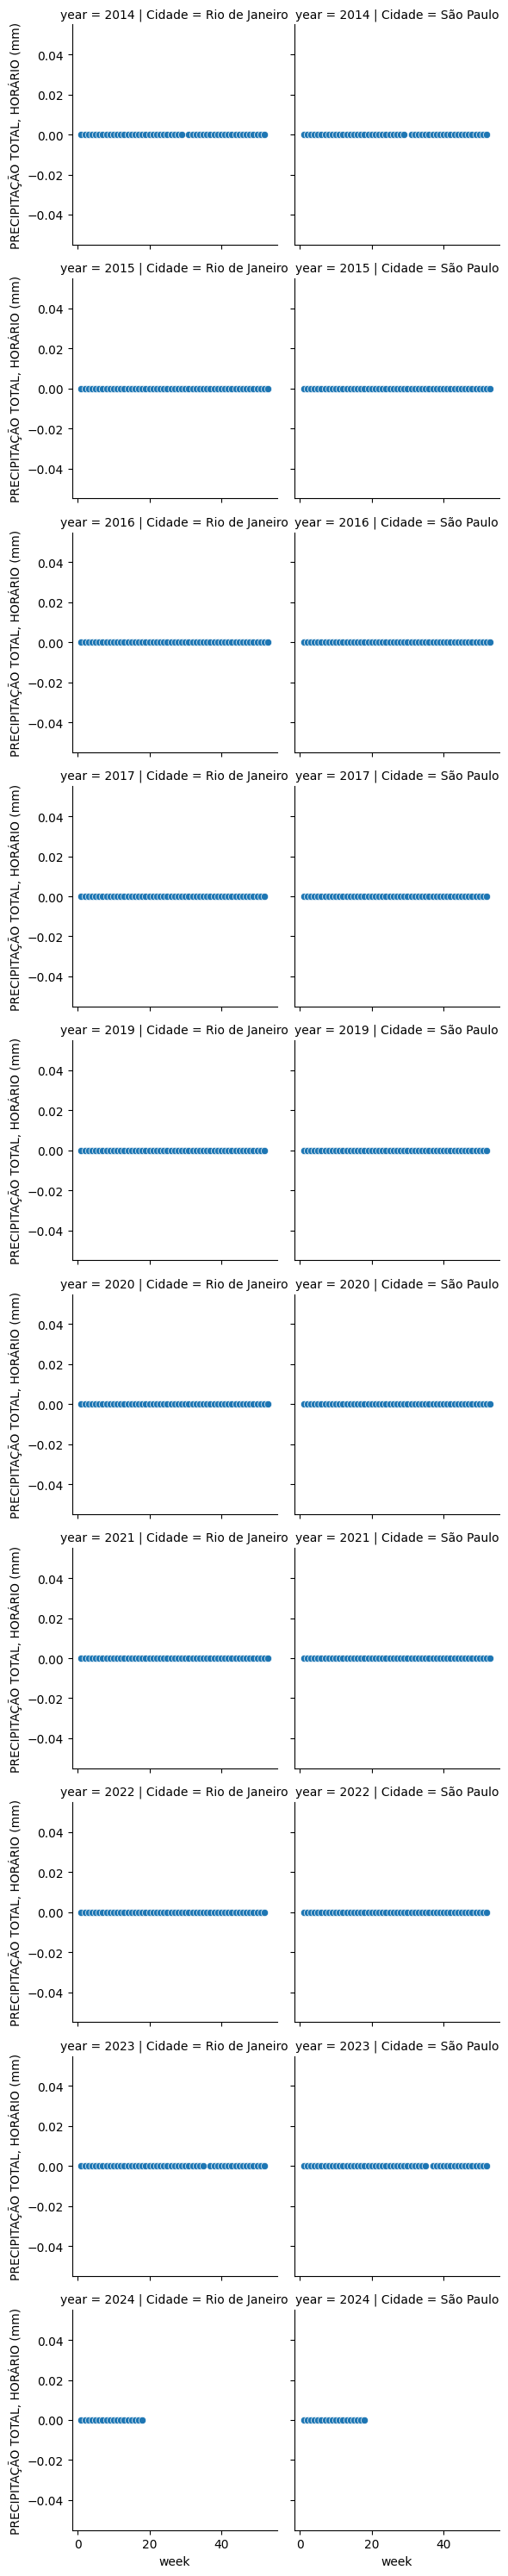

In [252]:
g = sns.FacetGrid(df_met_by_week, col="Cidade", row='year')
g.map(sns.scatterplot, "week", "PRECIPITAÇÃO TOTAL, HORÁRIO (mm)")

<Axes: xlabel='DATA (YYYY-MM-DD)', ylabel='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'>

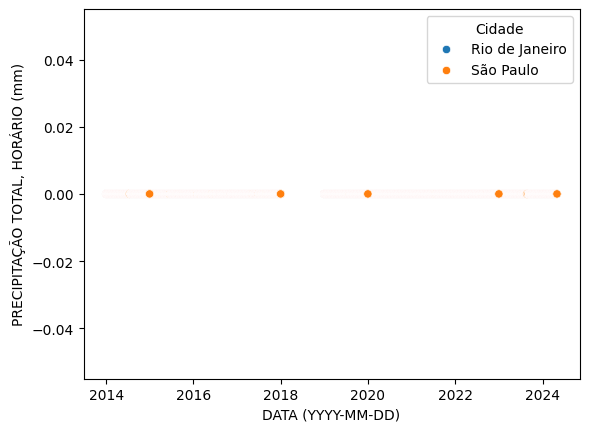

In [249]:

sns.scatterplot(df_met_f, x="DATA (YYYY-MM-DD)", y="PRECIPITAÇÃO TOTAL, HORÁRIO (mm)", hue="Cidade")